# Exploratory Analysis and Modeling

# Exploratory analysis

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# get data (5 fixtures avg. performance + next fixture actual points)
last_5_df = pd.read_csv('data/5_gw_perform_upto_gw19.csv')

## Midfield Players

Let's look at correlation between the variables. First we'll filter to midfield players who averaged at least 45 minutes per game over 5 games (made 5 appearances). 

In [3]:
# filter mids who play at least 45 min. per game
mid_filter = last_5_df[(last_5_df['position'] == 'MID') &
                       (last_5_df['mean_minutes'] >= 45)]
mid_filter

,Unnamed: 0,name,id,team,position,mean_points,mean_minutes,mean_goals_scored,mean_assists,mean_clean_sheets,...,mean_creativity,mean_threat,mean_ict,mean_xg,mean_xa,mean_xgi,mean_xgc,mean_opp_att,mean_opp_def,latest_points
2832,0,Granit Xhaka,3,Arsenal,MID,4.8,89.4,0.2,0.4,0.4,...,24.90,11.2,5.98,0.09540,0.077018,0.172418,0.64280,1106.0,1098.0,2
2833,0,Granit Xhaka,3,Arsenal,MID,4.8,89.4,0.2,0.4,0.2,...,24.88,20.0,6.82,0.12764,0.089838,0.217478,0.71080,1112.0,1116.0,5
2834,0,Granit Xhaka,3,Arsenal,MID,3.4,89.4,0.0,0.4,0.4,...,27.02,15.0,5.94,0.05902,0.120158,0.179178,0.72534,1100.0,1118.0,9
2835,0,Granit Xhaka,3,Arsenal,MID,4.0,90.0,0.2,0.2,0.2,...,24.26,20.0,6.36,0.12550,0.130630,0.256130,0.98860,1128.0,1152.0,2
2836,0,Granit Xhaka,3,Arsenal,MID,4.0,90.0,0.2,0.2,0.2,...,20.72,21.2,6.30,0.12204,0.166810,0.288850,1.04800,1174.0,1198.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6225,0,Matheus Luiz Nunes,589,Wolves,MID,1.4,50.4,0.0,0.0,0.2,...,11.26,10.8,2.58,0.06712,0.027988,0.095108,0.52804,1118.0,1124.0,1
6232,0,Boubacar Traoré,629,Wolves,MID,1.8,50.6,0.0,0.2,0.0,...,2.74,0.8,0.86,0.00596,0.007180,0.013140,0.77548,1118.0,1124.0,1
6233,0,Boubacar Traoré,629,Wolves,MID,1.8,67.0,0.0,0.2,0.0,...,3.04,1.4,1.00,0.01308,0.010212,0.023292,1.14216,1154.0,1158.0,0
6234,0,Boubacar Traoré,629,Wolves,MID,1.8,55.6,0.0,0.2,0.0,...,2.98,1.4,1.00,0.01308,0.010070,0.023150,1.02030,1150.0,1158.0,0


In [4]:
# correlation with latest points
mid_filter.corrwith(mid_filter['latest_points']).dropna().sort_values()

id                    -0.089811
mean_opp_def          -0.069185
mean_opp_att          -0.066549
mean_own_goals        -0.013771
mean_xgc               0.006659
mean_goals_conceded    0.009478
mean_bonus             0.069086
mean_clean_sheets      0.096414
mean_goals_scored      0.112684
mean_bps               0.135921
mean_influence         0.137980
mean_minutes           0.140371
mean_assists           0.144822
mean_xa                0.161579
mean_creativity        0.161819
mean_xg                0.164140
mean_points            0.169820
mean_threat            0.197756
mean_xgi               0.203462
mean_ict               0.218260
latest_points          1.000000
dtype: float64

For this data, minutes, ICT, expected assists, and opposition defensive strength (negative) seem to have the highest correlation with latest points. However, the correlation bewtween all variables and latest points is low.

array([[<AxesSubplot:title={'center':'Unnamed: 0'}>,
        <AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'mean_points'}>,
        <AxesSubplot:title={'center':'mean_minutes'}>,
        <AxesSubplot:title={'center':'mean_goals_scored'}>],
       [<AxesSubplot:title={'center':'mean_assists'}>,
        <AxesSubplot:title={'center':'mean_clean_sheets'}>,
        <AxesSubplot:title={'center':'mean_goals_conceded'}>,
        <AxesSubplot:title={'center':'mean_own_goals'}>,
        <AxesSubplot:title={'center':'mean_saves'}>],
       [<AxesSubplot:title={'center':'mean_bonus'}>,
        <AxesSubplot:title={'center':'mean_bps'}>,
        <AxesSubplot:title={'center':'mean_influence'}>,
        <AxesSubplot:title={'center':'mean_creativity'}>,
        <AxesSubplot:title={'center':'mean_threat'}>],
       [<AxesSubplot:title={'center':'mean_ict'}>,
        <AxesSubplot:title={'center':'mean_xg'}>,
        <AxesSubplot:title={'center':'mean_xa'}>,
        <AxesSubplo

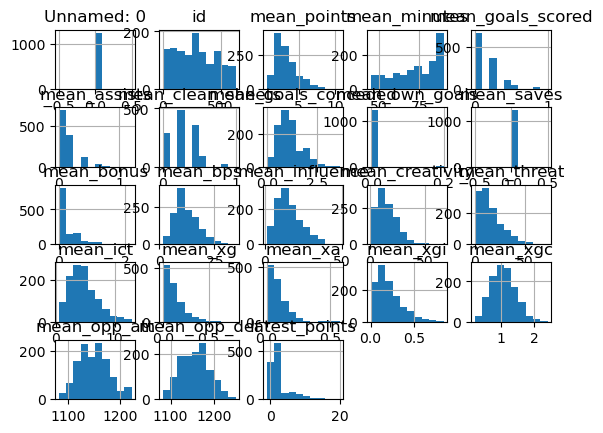

In [5]:
mid_filter.hist()

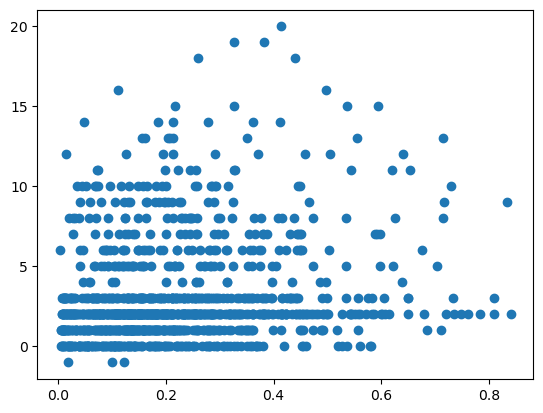

In [26]:
plt.scatter('mean_xgi', 'latest_points', data = mid_filter)

## Forward Players

Let's look at correlation between the variables. First we'll filter to forwards who averaged at least 45 minutes per game over 5 games (made 5 appearances). 

In [7]:
# filter fwds who play at least 45 min. per game
fwd_filter = last_5_df[(last_5_df['position'] == 'FWD') &
                       (last_5_df['mean_points'] >= 1)]
fwd_filter.head()

,Unnamed: 0,name,id,team,position,mean_points,mean_minutes,mean_goals_scored,mean_assists,mean_clean_sheets,...,mean_creativity,mean_threat,mean_ict,mean_xg,mean_xa,mean_xgi,mean_xgc,mean_opp_att,mean_opp_def,latest_points
6236,0,Eddie Nketiah,11,Arsenal,FWD,1.0,12.0,0.0,0.0,0.0,...,4.56,20.0,2.76,0.10522,0.013088,0.118308,0.12424,1106.0,1098.0,1
6237,0,Eddie Nketiah,11,Arsenal,FWD,1.0,13.8,0.0,0.0,0.0,...,2.50,20.4,2.58,0.10522,0.004574,0.109794,0.18496,1112.0,1116.0,1
6238,0,Eddie Nketiah,11,Arsenal,FWD,1.0,15.0,0.0,0.0,0.0,...,2.54,17.4,2.24,0.09746,0.004734,0.102194,0.16730,1100.0,1118.0,1
6239,0,Eddie Nketiah,11,Arsenal,FWD,1.0,13.8,0.0,0.0,0.0,...,0.48,14.4,1.64,0.08156,0.005514,0.087074,0.13418,1128.0,1152.0,1
6240,0,Eddie Nketiah,11,Arsenal,FWD,1.0,8.2,0.0,0.0,0.0,...,0.40,2.2,0.26,0.00986,0.004308,0.014168,0.09246,1174.0,1198.0,1


In [8]:
# correlation with latest points
fwd_filter.corrwith(fwd_filter['latest_points']).dropna().sort_values()

mean_opp_def          -0.103523
mean_opp_att          -0.099549
id                    -0.098941
mean_assists           0.070978
mean_goals_conceded    0.138567
mean_clean_sheets      0.141849
mean_xgc               0.150102
mean_creativity        0.219768
mean_xa                0.239127
mean_bonus             0.258668
mean_minutes           0.267301
mean_xg                0.284395
mean_threat            0.295043
mean_goals_scored      0.298615
mean_bps               0.300305
mean_xgi               0.303578
mean_points            0.303968
mean_influence         0.307320
mean_ict               0.316745
latest_points          1.000000
dtype: float64

It is interesting that the greatest correlation with latest points for forwards is with goals conceded and clean sheets (negative). Since forwards get points almost exclusively from goals and assists, I would have expected attacking stats to correlate most strongly with points. Perhaps this shows that forwards playing for more defense-minded teams have lower outputs.

array([[<AxesSubplot:title={'center':'Unnamed: 0'}>,
        <AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'mean_points'}>,
        <AxesSubplot:title={'center':'mean_minutes'}>,
        <AxesSubplot:title={'center':'mean_goals_scored'}>],
       [<AxesSubplot:title={'center':'mean_assists'}>,
        <AxesSubplot:title={'center':'mean_clean_sheets'}>,
        <AxesSubplot:title={'center':'mean_goals_conceded'}>,
        <AxesSubplot:title={'center':'mean_own_goals'}>,
        <AxesSubplot:title={'center':'mean_saves'}>],
       [<AxesSubplot:title={'center':'mean_bonus'}>,
        <AxesSubplot:title={'center':'mean_bps'}>,
        <AxesSubplot:title={'center':'mean_influence'}>,
        <AxesSubplot:title={'center':'mean_creativity'}>,
        <AxesSubplot:title={'center':'mean_threat'}>],
       [<AxesSubplot:title={'center':'mean_ict'}>,
        <AxesSubplot:title={'center':'mean_xg'}>,
        <AxesSubplot:title={'center':'mean_xa'}>,
        <AxesSubplo

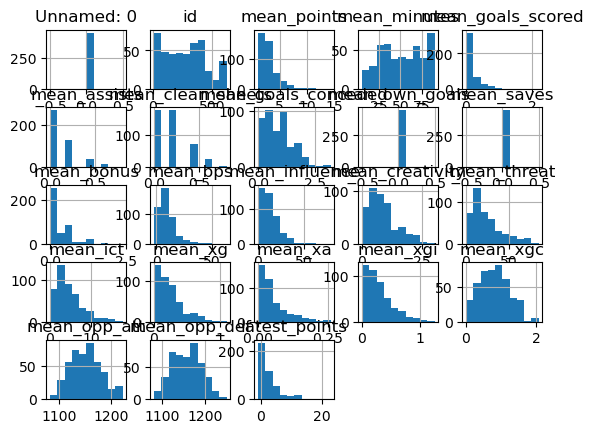

In [9]:
fwd_filter.hist()

## Defenders

Doing the same as above with defenders. For defenders we will filter to those who play at least 60 minutes per game (as required to get clean sheet points).

In [10]:
# filter def who play at least 60 min. per game
def_filter = last_5_df[(last_5_df['position'] == 'DEF') &
                       (last_5_df['mean_minutes'] >= 60)]
def_filter.head()

,Unnamed: 0,name,id,team,position,mean_points,mean_minutes,mean_goals_scored,mean_assists,mean_clean_sheets,...,mean_creativity,mean_threat,mean_ict,mean_xg,mean_xa,mean_xgi,mean_xgc,mean_opp_att,mean_opp_def,latest_points
36,0,Benjamin White,10,Arsenal,DEF,4.4,78.4,0.0,0.0,0.6,...,7.38,1.6,2.28,0.0000,0.091910,0.091910,0.53214,1106.0,1098.0,1
37,0,Benjamin White,10,Arsenal,DEF,3.6,76.2,0.0,0.0,0.4,...,6.26,1.6,1.72,0.0000,0.105430,0.105430,0.57758,1112.0,1116.0,6
38,0,Benjamin White,10,Arsenal,DEF,4.6,78.4,0.0,0.0,0.6,...,11.12,2.0,2.38,0.0000,0.114838,0.114838,0.61534,1100.0,1118.0,5
39,0,Benjamin White,10,Arsenal,DEF,4.2,81.2,0.0,0.2,0.4,...,16.54,2.2,3.42,0.0046,0.171136,0.175736,0.90712,1128.0,1152.0,1
40,0,Benjamin White,10,Arsenal,DEF,4.2,81.2,0.0,0.2,0.4,...,16.14,2.6,3.34,0.0046,0.166776,0.171376,0.96652,1174.0,1198.0,6


In [11]:
# correlation with latest points
def_filter.corrwith(def_filter['latest_points']).dropna().sort_values()

mean_xgc              -0.079641
mean_goals_conceded   -0.048215
mean_opp_att          -0.044493
id                    -0.015886
mean_xg               -0.009695
mean_opp_def          -0.008749
mean_own_goals        -0.004295
mean_goals_scored      0.007619
mean_threat            0.019536
mean_minutes           0.074228
mean_clean_sheets      0.088649
mean_influence         0.105978
mean_assists           0.118549
mean_xgi               0.133371
mean_ict               0.143005
mean_creativity        0.143839
mean_points            0.147396
mean_bonus             0.149193
mean_xa                0.164445
mean_bps               0.185564
latest_points          1.000000
dtype: float64

For defenders, past points have a stronger correlation with latest points (compared to forwards and midfielders). This suggests that defenders produce more consistent points. It is expected that xgc and goals conceded have a negative correlation with points scored by defenders, since conceding goals robs defenders of most of their points. 

# Predicting next fixture points using regression
Trying linear regression for better speed vs. KNN regression

In [12]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

import numpy as np

In [13]:
#import data
data = pd.read_csv("data/last_5_gw14-19.csv")

## Midfield Players

In [14]:
#filter midfielders
mid_data = data[(data['position'] == 'MID') &
                    (data['mean_minutes'] >= 45)]

# split the data for training and testing using 60:40 split
mid_train, mid_test = train_test_split(
    mid_data, train_size=0.6, random_state=1234
)

we will use all predictors for midfield players

In [15]:
lm = linear_model.LinearRegression()

#X_train = mid_train[["mean_minutes", "mean_ict", "mean_xa", "mean_opp_def", "mean_xgi"]]
X_train = mid_train.drop(['name', 'team', 'id', 'position', 'latest_points'], axis = 1)
y_train = mid_train[["latest_points"]]

# fit the linear regression model
lm.fit(X_train, y_train)

LinearRegression()

In [16]:
X_test = mid_test.drop(['name', 'team', 'id', 'position', 'latest_points'], axis = 1)
y_test = mid_test[["latest_points"]]

# predict on test data
mid_preds = mid_test
mid_preds = mid_preds.assign(predicted=lm.predict(X_test))

# calculate RMSPE
RMSPE = np.sqrt(
    mean_squared_error(y_true=mid_preds["latest_points"], y_pred=mid_preds["predicted"])
)

RMSPE


2.951864462367164

Since RMSPE is in units of the response variable "latest_points", the prediction appears to be accurate to within ~2 points. This is a decent prediction, considering the variability associated with football player performance. As midfielders get most of their FPL points from goals and assists and football is a relatively low scoring game, it is expected that it is hard to accurately predict whether any individual player will score points.

In [17]:
# show the highest predicted points
mid_preds.sort_values('predicted', ascending=False).head(10)

,Unnamed: 0,name,id,team,position,mean_points,mean_minutes,mean_goals_scored,mean_assists,mean_clean_sheets,...,mean_threat,mean_ict,mean_xg,mean_xa,mean_xgi,mean_xgc,mean_opp_att,mean_opp_def,latest_points,predicted
244,0,Gabriel Martinelli Silva,19,Arsenal,MID,7.0,83.8,0.6,0.4,0.6,...,40.4,7.62,0.24616,0.086052,0.332212,0.70508,1134.0,1132.0,3,6.545265
294,0,Pascal Groß,104,Brighton,MID,5.0,90.0,0.4,0.2,0.0,...,12.6,5.48,0.09810,0.129598,0.227698,1.77338,1162.0,1150.0,8,6.026952
435,0,Marcus Rashford,335,Man Utd,MID,6.2,80.0,0.6,0.2,0.4,...,52.4,9.14,0.33832,0.134272,0.472592,0.81224,1102.0,1100.0,8,5.631341
464,0,Ryan Yates,387,Nott'm Forest,MID,1.6,90.0,0.0,0.0,0.2,...,6.8,1.86,0.03990,0.014756,0.054656,1.68022,1172.0,1176.0,3,3.775219
434,0,Bruno Borges Fernandes,333,Man Utd,MID,3.4,72.0,0.0,0.4,0.6,...,24.8,7.38,0.10792,0.269422,0.377342,0.74106,1102.0,1100.0,6,3.697298
392,0,Rodrigo Moreno,225,Leeds,MID,6.2,74.2,0.8,0.0,0.2,...,35.2,7.56,0.47206,0.031538,0.503598,1.85716,1220.0,1220.0,6,3.627796
452,0,Miguel Almirón Rejala,369,Newcastle,MID,7.4,84.0,0.6,0.4,1.0,...,31.8,8.24,0.26240,0.071136,0.333536,0.54128,1120.0,1142.0,2,3.611400
271,0,Jefferson Lerma Solís,64,Bournemouth,MID,2.0,90.0,0.0,0.0,0.2,...,9.2,3.28,0.03710,0.076652,0.113752,1.66268,1148.0,1152.0,2,3.554164
454,0,Joelinton Cássio Apolinário de Lira,371,Newcastle,MID,5.2,72.0,0.4,0.2,0.8,...,25.0,6.48,0.20840,0.120964,0.329364,0.33066,1120.0,1142.0,2,3.409628
456,0,Bruno Guimarães Rodriguez Moura,374,Newcastle,MID,4.2,88.4,0.2,0.2,0.8,...,12.6,4.62,0.06342,0.055272,0.118692,0.67958,1120.0,1142.0,2,3.170163


## Forward Players

In [18]:
#filter forwards
fwd_data = data[(data['position'] == 'FWD') &
                    (data['mean_minutes'] >= 45)]

# split the data for training and testing using 60:40 split
fwd_train, fwd_test = train_test_split(
    fwd_data, train_size=0.6, random_state=1234
)

In [19]:
lm = linear_model.LinearRegression()
X_train_fwd = fwd_train[["mean_minutes", "mean_clean_sheets", "mean_goals_conceded"]]
y_train_fwd = fwd_train[["latest_points"]]

# fit the linear regression model
lm.fit(X_train_fwd, y_train_fwd)

LinearRegression()

In [20]:
X_test_fwd = fwd_test[["mean_minutes", "mean_clean_sheets", "mean_goals_conceded"]]
y_test_fwd = fwd_test[["latest_points"]]

# predict on test data
fwd_preds = fwd_test
fwd_preds = fwd_preds.assign(predicted=lm.predict(X_test_fwd))

# calculate RMSPE
RMSPE = np.sqrt(
    mean_squared_error(y_true=fwd_preds["latest_points"], y_pred=fwd_preds["predicted"])
)

RMSPE

7.079902062277482

In [21]:
# show the highest predicted points
fwd_preds.sort_values('predicted', ascending=False).head(10)

,Unnamed: 0,name,id,team,position,mean_points,mean_minutes,mean_goals_scored,mean_assists,mean_clean_sheets,...,mean_threat,mean_ict,mean_xg,mean_xa,mean_xgi,mean_xgc,mean_opp_att,mean_opp_def,latest_points,predicted
599,0,Che Adams,411,Southampton,FWD,3.8,84.6,0.2,0.2,0.0,...,37.4,6.52,0.40418,0.160814,0.564994,1.16908,1162.0,1178.0,2,12.847732
539,0,Kieffer Moore,62,Bournemouth,FWD,5.0,84.0,0.6,0.0,0.2,...,24.6,5.48,0.41456,0.027858,0.442418,1.61450,1148.0,1152.0,1,11.209051
540,0,Dominic Solanke,66,Bournemouth,FWD,3.2,89.6,0.2,0.2,0.2,...,29.4,4.80,0.20896,0.014356,0.223316,1.58928,1148.0,1152.0,2,8.999739
543,0,Bryan Mbeumo,95,Brentford,FWD,2.6,74.8,0.2,0.2,0.0,...,19.0,5.76,0.28096,0.174798,0.455758,0.87362,1170.0,1162.0,12,2.420375
542,0,Ivan Toney,80,Brentford,FWD,6.2,72.0,0.8,0.2,0.2,...,59.2,10.60,0.63414,0.058914,0.693054,0.89832,1170.0,1162.0,0,1.007882
586,0,Anthony Martial,345,Man Utd,FWD,2.2,48.0,0.2,0.0,0.4,...,21.0,3.62,0.32566,0.073640,0.399300,0.38768,1102.0,1100.0,2,-1.492101
588,0,Chris Wood,354,Newcastle,FWD,4.0,54.8,0.4,0.0,0.6,...,14.2,3.56,0.30968,0.047982,0.357662,0.42776,1120.0,1142.0,1,-2.258036
533,0,Gabriel Fernando de Jesus,28,Arsenal,FWD,2.6,54.0,0.0,0.4,0.6,...,42.4,7.30,0.31360,0.150462,0.464062,0.28044,1134.0,1132.0,0,-3.809346


## Defenders

In [22]:
#filter forwards
def_data = data[(data['position'] == 'DEF') &
                (data['mean_minutes'] >= 60)]

# split the data for training and testing using 60:40 split
def_train, def_test = train_test_split(
    def_data, train_size=0.6, random_state=1234
)

In [23]:
lm = linear_model.LinearRegression()

X_train_def = def_train[["mean_xgc", "mean_opp_att",
                         "mean_goals_conceded", "mean_xgi", "mean_bps",
                        "mean_clean_sheets", "mean_points"]]
y_train_def = def_train[["latest_points"]]

# fit the linear regression model
lm.fit(X_train_def, y_train_def)

LinearRegression()

In [24]:
X_test_def = def_test[["mean_xgc", "mean_opp_att",
                         "mean_goals_conceded", "mean_xgi", "mean_bps",
                        "mean_clean_sheets", "mean_points"]]
y_test_def = def_test[["latest_points"]]

# predict on test data
def_preds = def_test
def_preds = def_preds.assign(predicted=lm.predict(X_test_def))

# calculate RMSPE
RMSPE = np.sqrt(
    mean_squared_error(y_true=def_preds["latest_points"], y_pred=def_preds["predicted"])
)

RMSPE

3.097092888910334

In [25]:
# show the highest predicted points
def_preds.sort_values('predicted', ascending=False).head(10)

,Unnamed: 0,name,id,team,position,mean_points,mean_minutes,mean_goals_scored,mean_assists,mean_clean_sheets,...,mean_threat,mean_ict,mean_xg,mean_xa,mean_xgi,mean_xgc,mean_opp_att,mean_opp_def,latest_points,predicted
174,0,Fabian Schär,366,Newcastle,DEF,5.4,88.4,0.0,0.0,0.8,...,10.4,3.08,0.10032,0.045710,0.146030,0.67958,1120.0,1142.0,6,5.961830
177,0,Sven Botman,377,Newcastle,DEF,5.4,85.2,0.0,0.0,0.8,...,4.6,2.06,0.07376,0.005000,0.078760,0.67958,1120.0,1142.0,6,5.056022
155,0,Luke Shaw,332,Man Utd,DEF,5.6,84.8,0.0,0.2,0.6,...,1.4,3.18,0.00424,0.138278,0.142518,0.90068,1102.0,1100.0,15,4.907326
142,0,John Stones,302,Man City,DEF,2.8,90.0,0.0,0.0,0.2,...,12.0,3.52,0.06954,0.040236,0.109776,0.72290,1084.0,1138.0,9,3.910813
100,0,Kenny Tete,215,Fulham,DEF,3.2,72.0,0.0,0.2,0.4,...,6.4,4.14,0.04158,0.125928,0.167508,0.99162,1158.0,1190.0,0,3.898944
75,0,Joachim Andersen,165,Crystal Palace,DEF,3.2,90.0,0.0,0.0,0.4,...,5.8,2.74,0.04520,0.017506,0.062706,1.17592,1082.0,1086.0,0,3.475215
205,0,Ben Davies,432,Spurs,DEF,3.2,72.2,0.4,0.0,0.0,...,9.6,3.86,0.07364,0.058748,0.132388,0.76428,1138.0,1156.0,1,3.440613
76,0,Marc Guéhi,167,Crystal Palace,DEF,3.0,72.0,0.0,0.0,0.4,...,3.8,1.74,0.01464,0.008618,0.023258,0.65476,1082.0,1086.0,0,3.433691
29,0,Jordan Zemura,76,Bournemouth,DEF,1.8,67.8,0.0,0.0,0.2,...,3.6,2.60,0.00000,0.052364,0.052364,1.10670,1148.0,1152.0,0,3.047979
111,0,Timothy Castagne,258,Leicester,DEF,3.2,90.0,0.0,0.0,0.4,...,11.6,4.66,0.12164,0.040652,0.162292,1.53886,1208.0,1216.0,1,2.993408


## Model Considerations and Improvements

- Data analyzed from one incomplete season so far. Perhaps we can reduce noise if data is collected across the whole season or multiple season. This would involve collecting data for each gameweek and the 5 preceeding gameweeks and appending it to the data as was done in this program.
- The predictor doesn't currently consider opposition strength for the next fixture. I expect that players playing stronger teams are likely to return fewer points, especially those players who play for weaker teams. 
- This predictor attempts to analyze player form over 5 consecutive fixtures, assuming that they will maintain that form. Despite being elite athletes, football players are human and can go through periods of good and bad form. 
- Predicting points for forwards doesn't seem to be straighforward with this dataset/model. Perhaps this can be improved by collecting data over a longer time-span.